In [3]:
from redplanet import Heat
# from redplanet import Crust

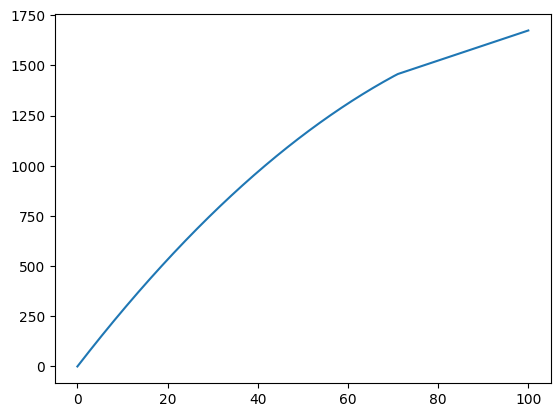

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# lon, lat = 0, 0
# t_Ga = 3.6




from redplanet import Craters

name = 'henry'
thiscrater = Craters.get(name)
lon, lat = thiscrater['lon'], thiscrater['lat']
lon=-180
lat=-52

t_Ga = 3.6




# print(Crust.get('thick', lon, lat))

depths_km = np.linspace(0, 100, 1000)
dat = []

for z_km in depths_km:
    dat.append(Heat.calc_temp_at_depth(lon=lon, lat=lat, depth_km=z_km, t_Ga=t_Ga, q_b_mW=30))

dat = np.asarray(dat)

plt.plot(depths_km, dat)

In [4]:
from redplanet import Heat
# Heat.load_crust_model(RIM='DWThotCrust1r', insight_thickness=30, rho_north=2900, rho_south=2800)

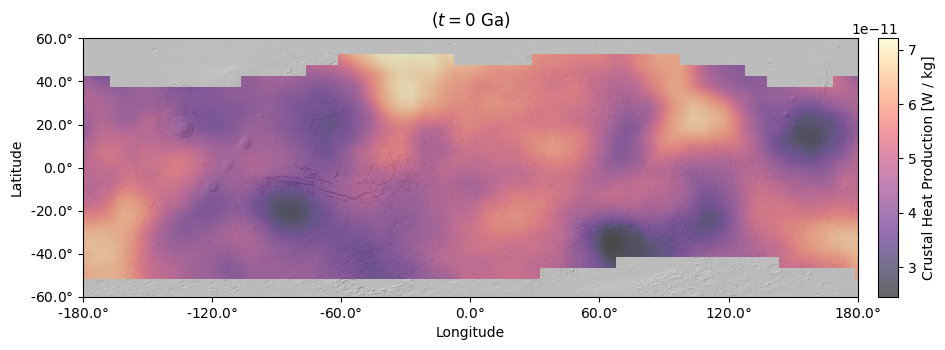

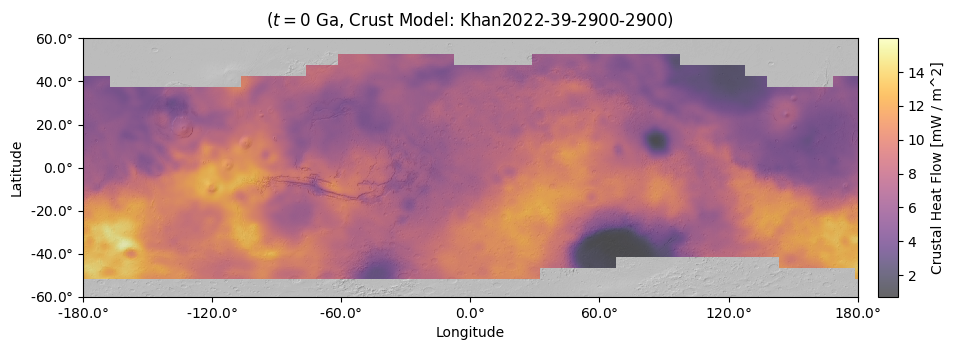

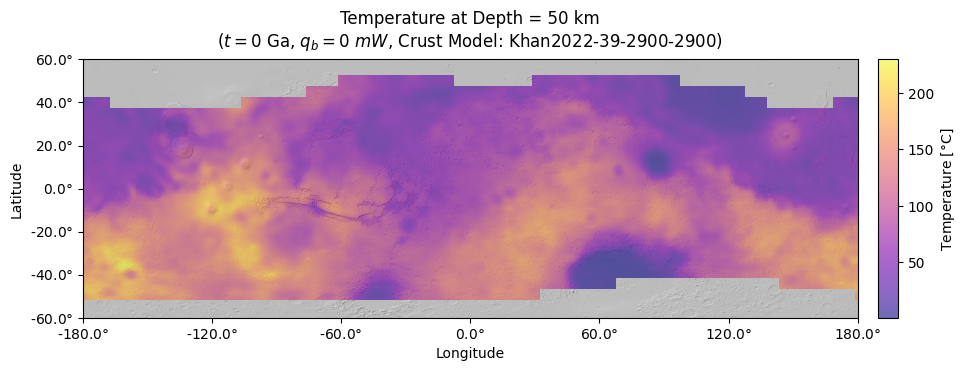

In [2]:
Heat.visualize('H', t_Ga=0, overlay=True)

Heat.visualize('heat flow', t_Ga=0, overlay=True)

Heat.visualize('temp at depth', t_Ga=0, depth_km=50, overlay=True)

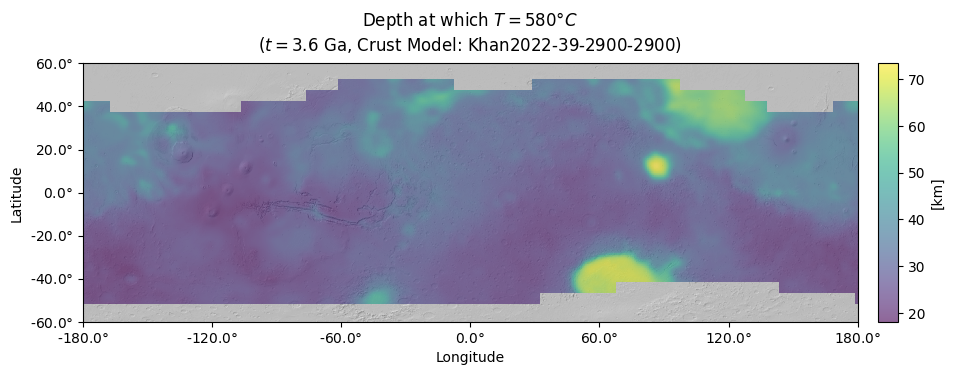

In [5]:
Heat.visualize('depth at temp', temp_C=580, t_Ga=3.6, q_b_mW=30, overlay=True)

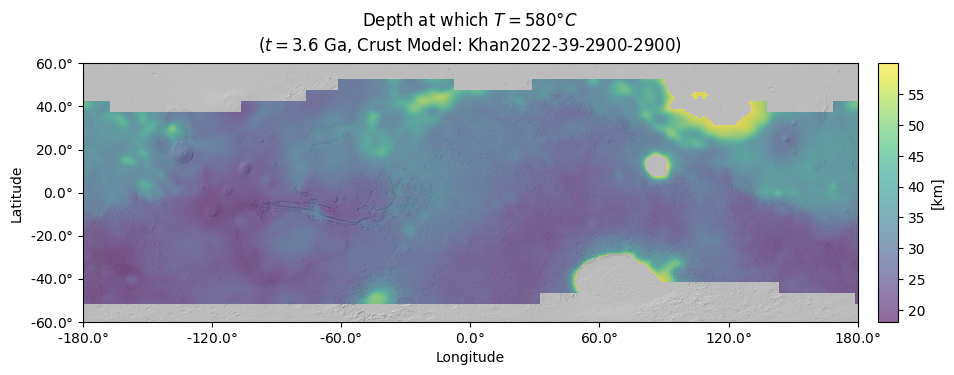

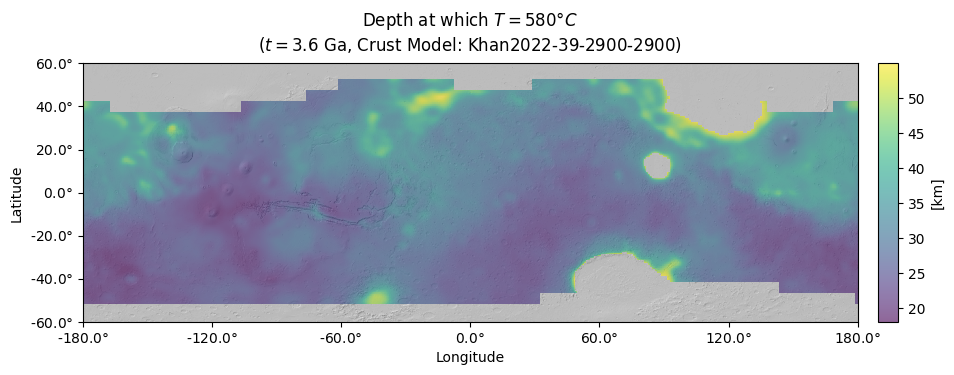

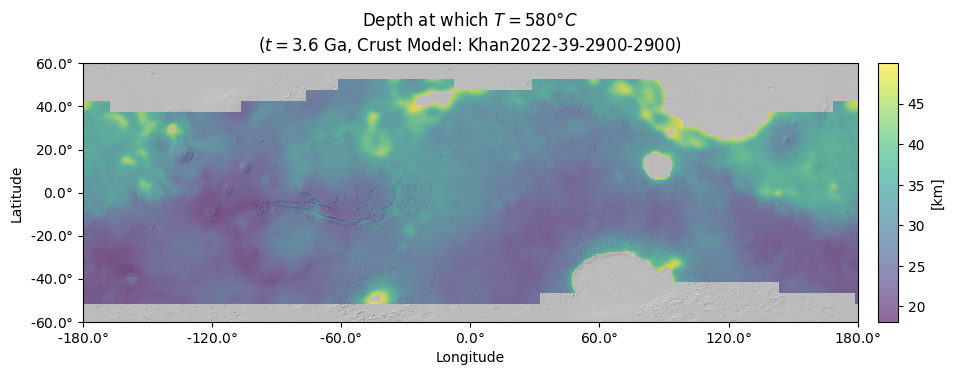

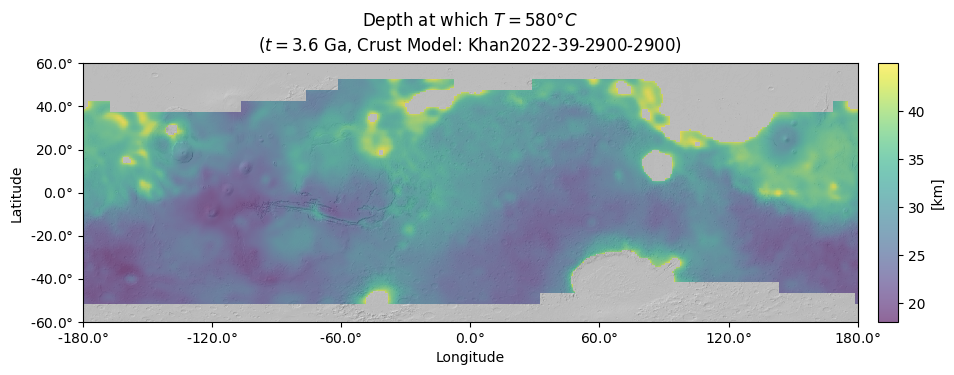

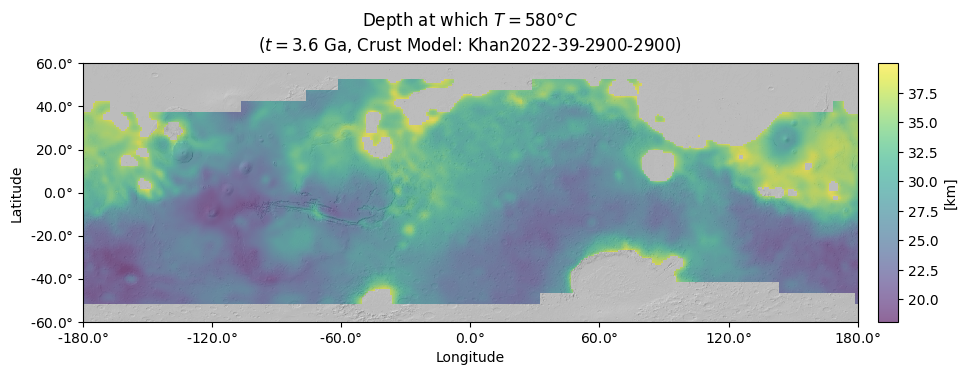

In [3]:
'''testing out different making values for the same initial parameters'''

for mask_value in range(60,39,-5):
    Heat.visualize('depth at temp', temp_C=580, t_Ga=3.6, q_b_mW=30, mask_upper=mask_value, overlay=True)

luju's heat flow map:

<p align="center">
  <a href="https://files.catbox.moe/mbktxw.png">
    <img width="800" src="https://files.catbox.moe/mbktxw.png">
  </a>
</p>

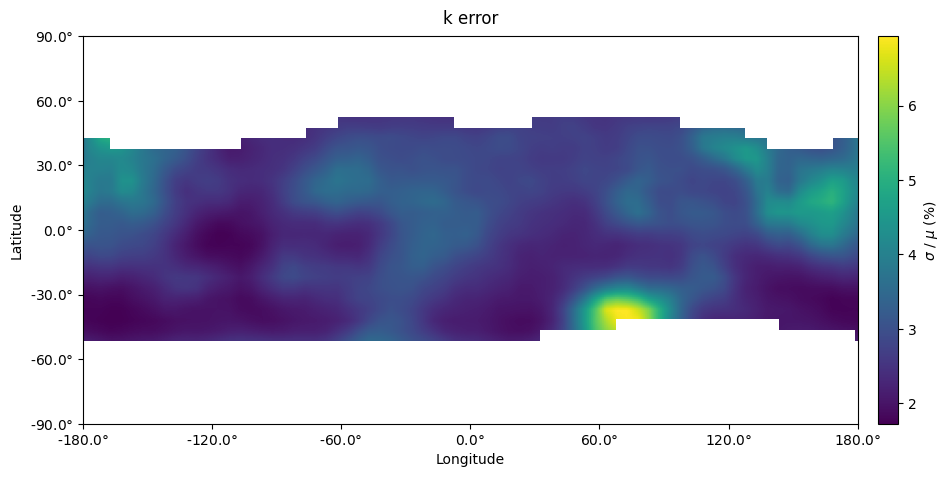

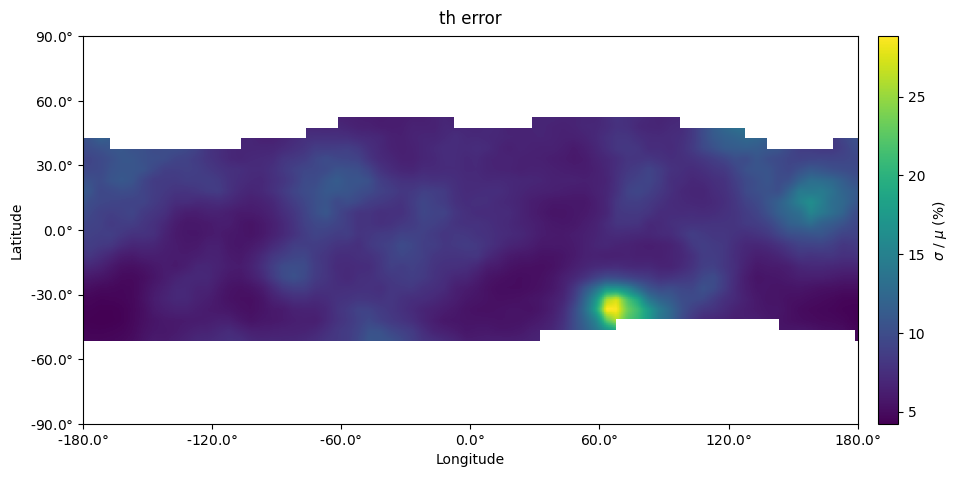

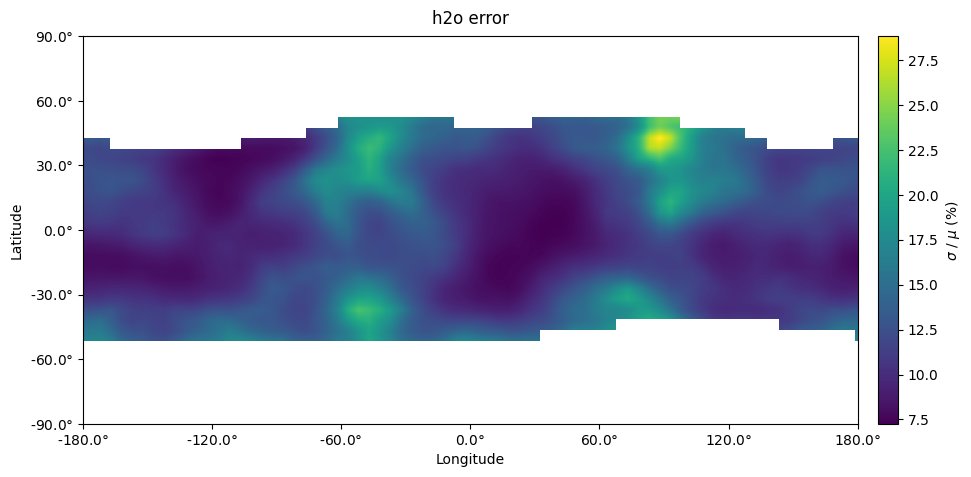

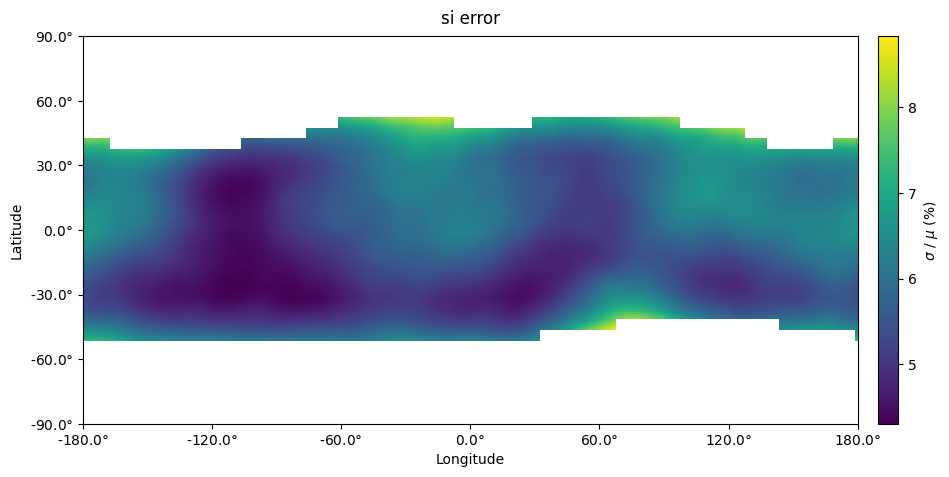

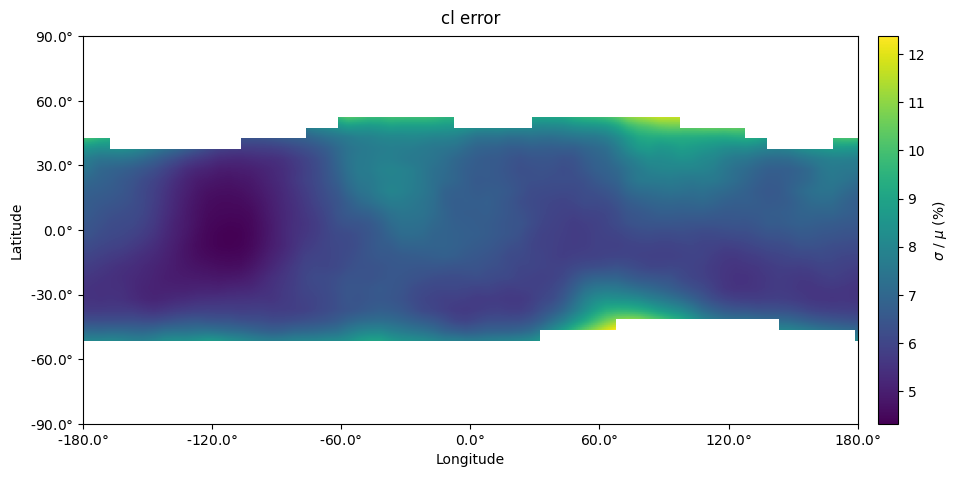

In [41]:
from redplanet import GRS
from redplanet import utils

def plotError(element_name):
    def plotThis(lon, lat):
        c = GRS.get(element_name, lon, lat, quantity='concentration',)
        s = GRS.get(element_name, lon, lat, quantity='sigma')
        if c < 0 or s < 0:
            return -1
        return s/c*100
    utils.visualize(plotThis, lower_limit=0, title=f'{element_name} error', cbar_title='$\sigma \ / \ \mu$ (%)')


plotError('k')
plotError('th')
plotError('h2o')
plotError('si')
plotError('cl')